## The cross pair correlation function (cross-PCF)

The <i>cross pair correlation function</i> [(cross-PCF, also known as the Radial Distribution Function)](https://en.wikipedia.org/wiki/Radial_distribution_function) is a spatial statistic that characterises <i>clustering</i> or <i>exclusion</i> at different length scales. Consider two populations of points, that we'll call $A$ and $B$. Then the cross-PCF, $g_{AB}(r)$, can be thought of as a ratio describing whether the observed number of pairs of points separated by distance $r$ (where one is type $A$ and the other type $B$) is higher or lower than would be expected under a statistical null model. In brief, $g_{AB}(r) > 1$ indicates increased numbers of $A-B$ pairs separated by distance $r$, which indicates clustering. $g_{AB}(r) < 1$ suggests exclusion, or regularity.

Let's consider some examples.

MuSpAn domain loaded successfully. Domain summary:
Domain name: Aggregation
Number of objects: 2000
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []


(<Figure size 2700x2160 with 2 Axes>, <Axes: >)

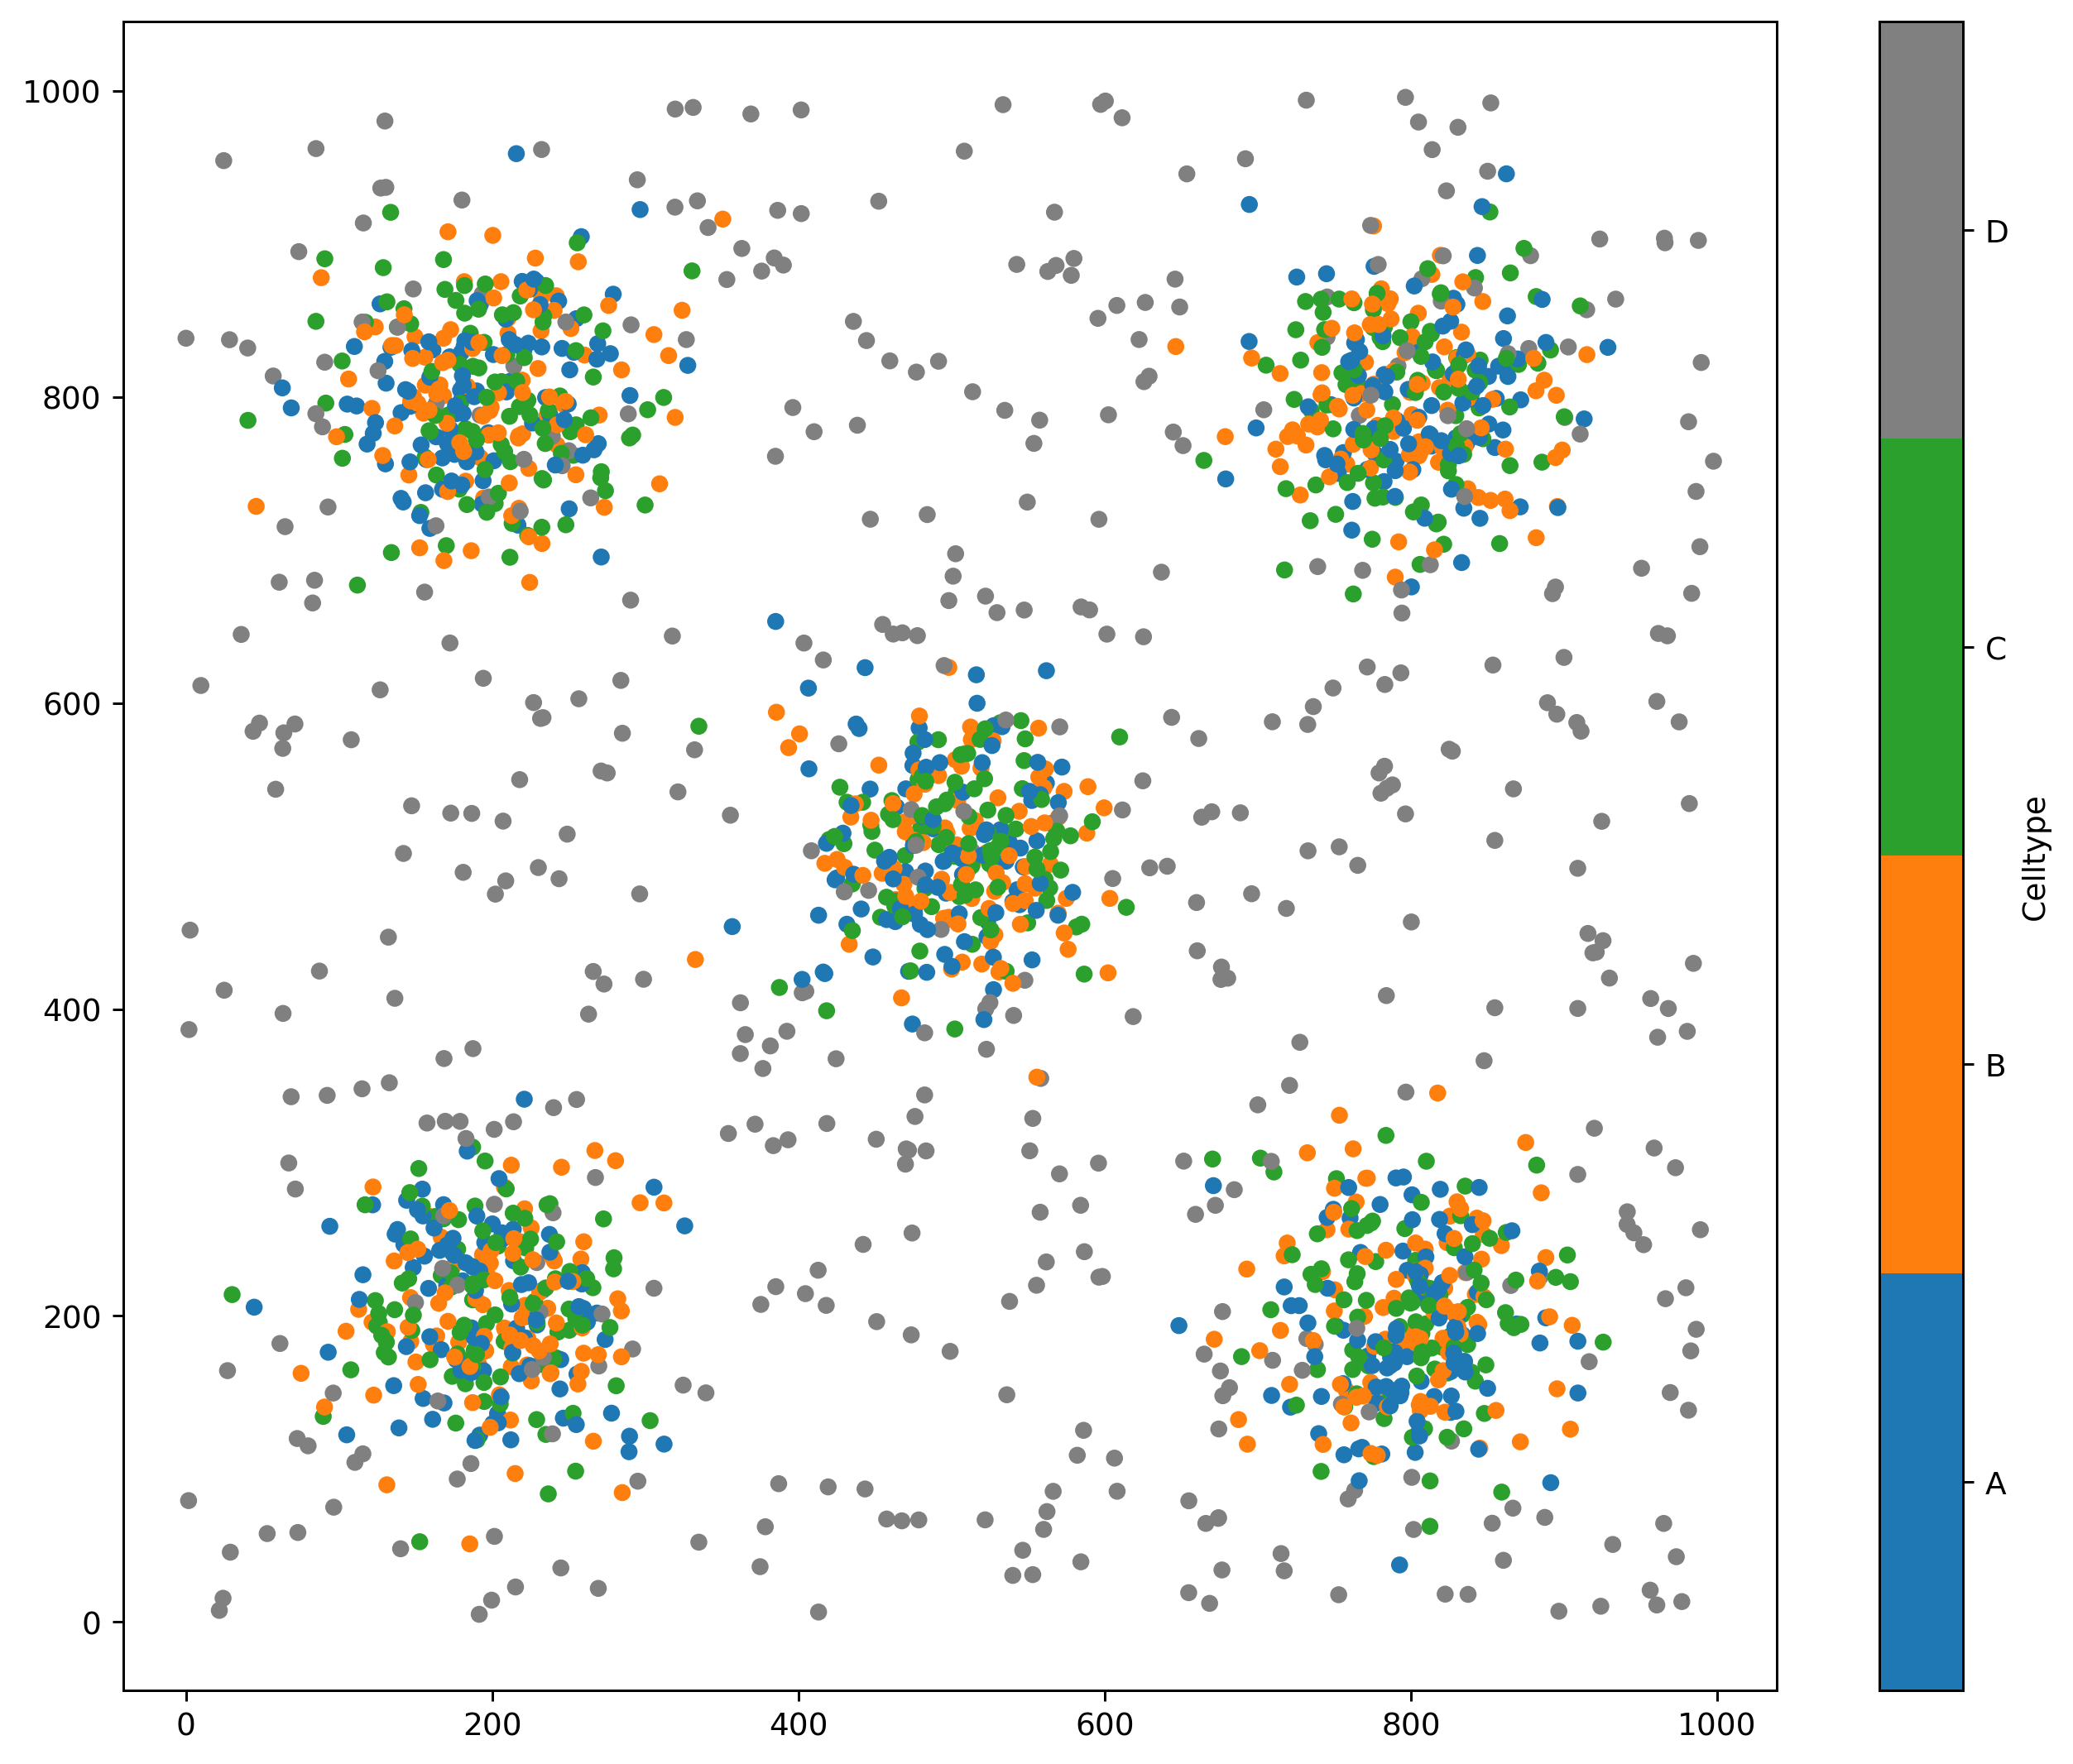

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import muspan as ms

# Set the resolution for the plots
plt.rcParams['figure.dpi'] = 270

# Load the example domain dataset
domain = ms.datasets.load_example_domain('Synthetic-Points-Aggregation')

# Visualise the domain, coloring points by their cell type
ms.visualise.visualise(domain, color_by='Celltype')

In this dataset, points of Celltype D are randomly spread across the domain. MuSpAn's spatial statistics currently compare against a null model of complete spatial randomess (CSR, i.e., assuming that the points are randomly spread throughout the domain). Let's calculate $g_{DD}(r)$, the cross-PCF between points of Celltype D and other points of Celltype D. We can visualise the results of this statistic using the `visualise_output` parameter.

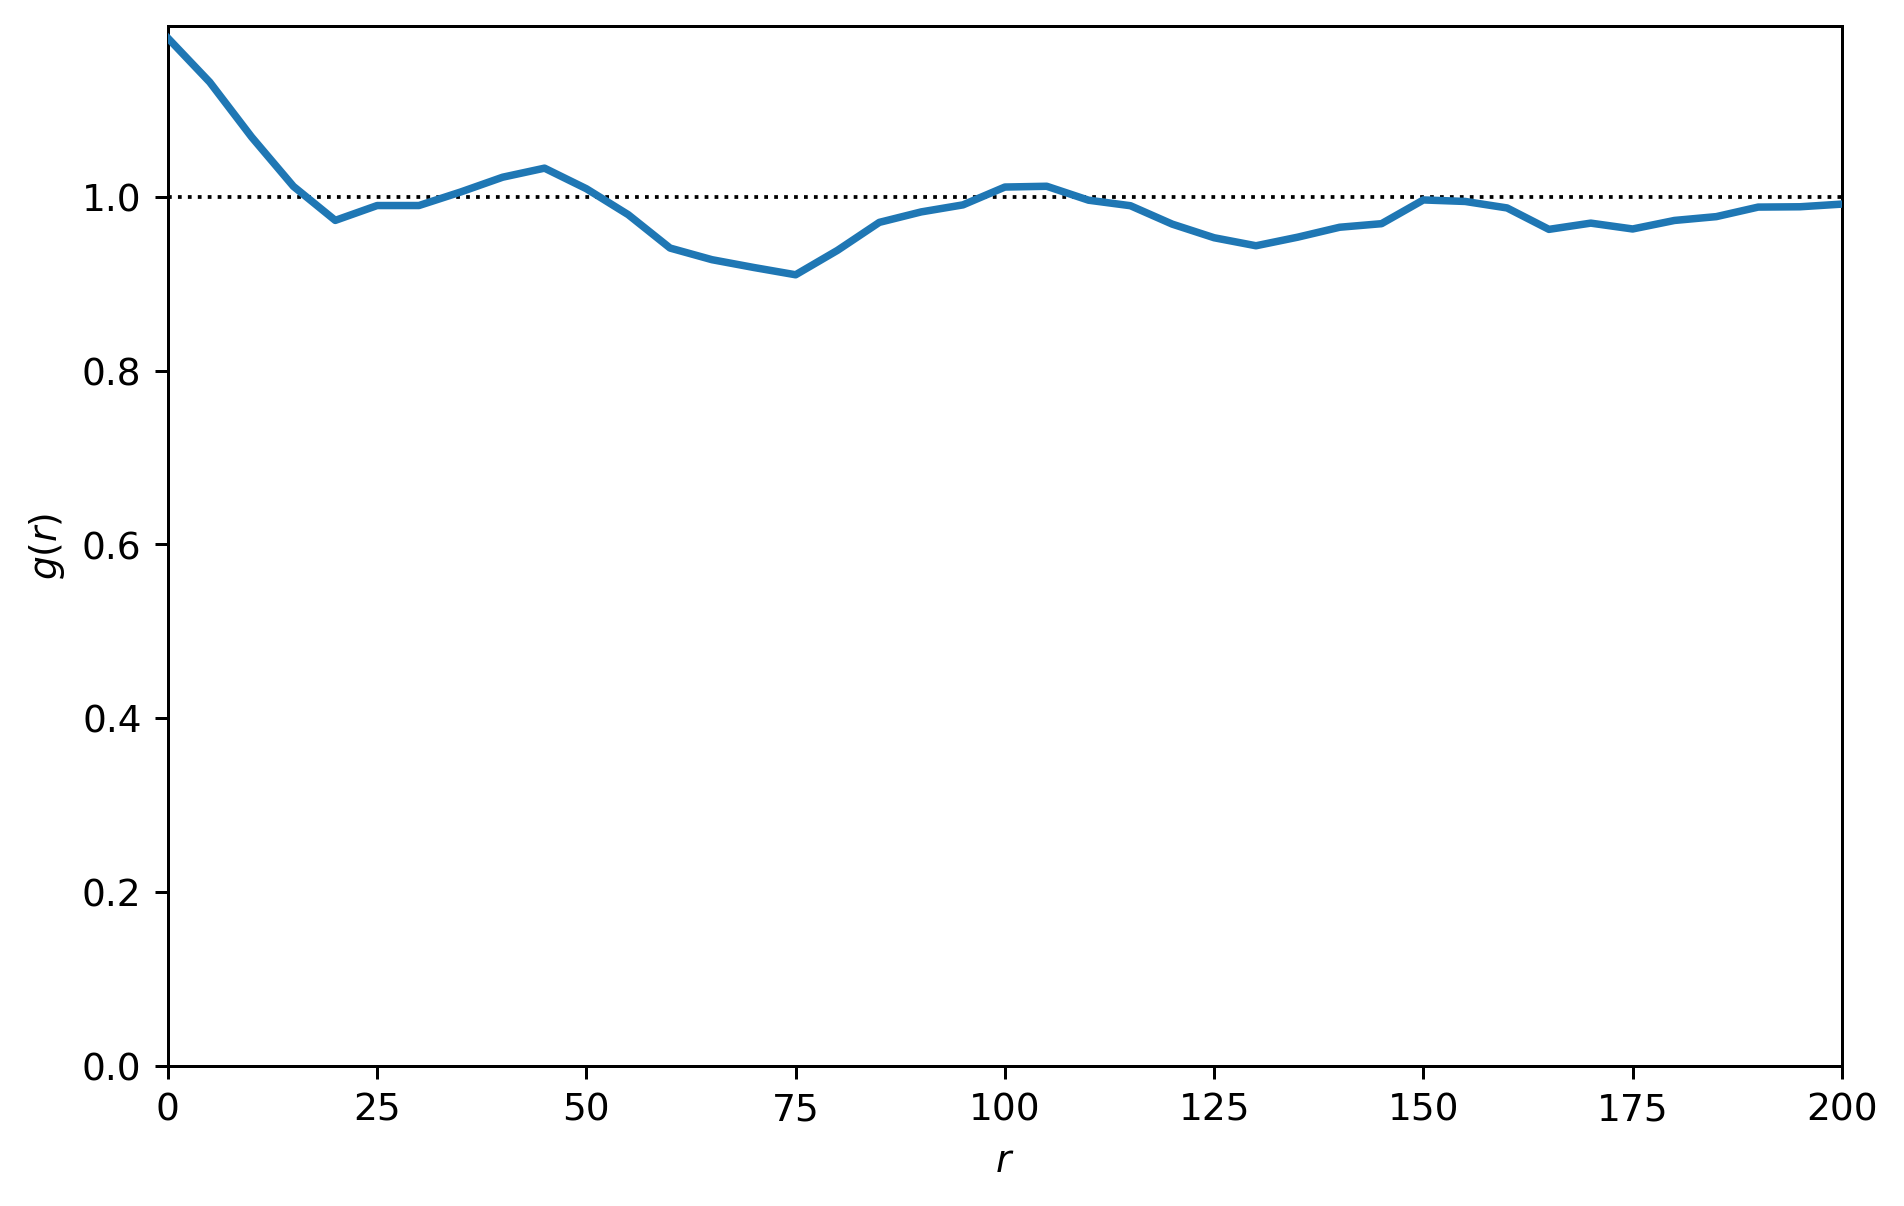

In [2]:
# Query the domain for points of Celltype D
pop_D = ms.query.query(domain, ('label', 'Celltype'), 'is', 'D')

# Calculate the cross-PCF for points of Celltype D with themselves
# max_R: maximum radius to consider
# annulus_step: step size for the annulus
# annulus_width: width of the annulus
# visualise_output: whether to visualise the output
r, PCF = ms.spatial_statistics.cross_pair_correlation_function(
    domain=domain, 
    population_A=pop_D, 
    population_B=pop_D, 
    max_R=200, 
    annulus_step=5, 
    annulus_width=25, 
    visualise_output=True
)

The black dashed line shows the expected value of $g_{DD}(r)$ under CSR. In this example, we don't see a substantial deviation in the cross-PCF away from this value, which makes sense, since the locations of each point in $D$ are independent of one another.

The other three Celltypes are spatially clustered. Let's look at all the cross-PCF combinations.

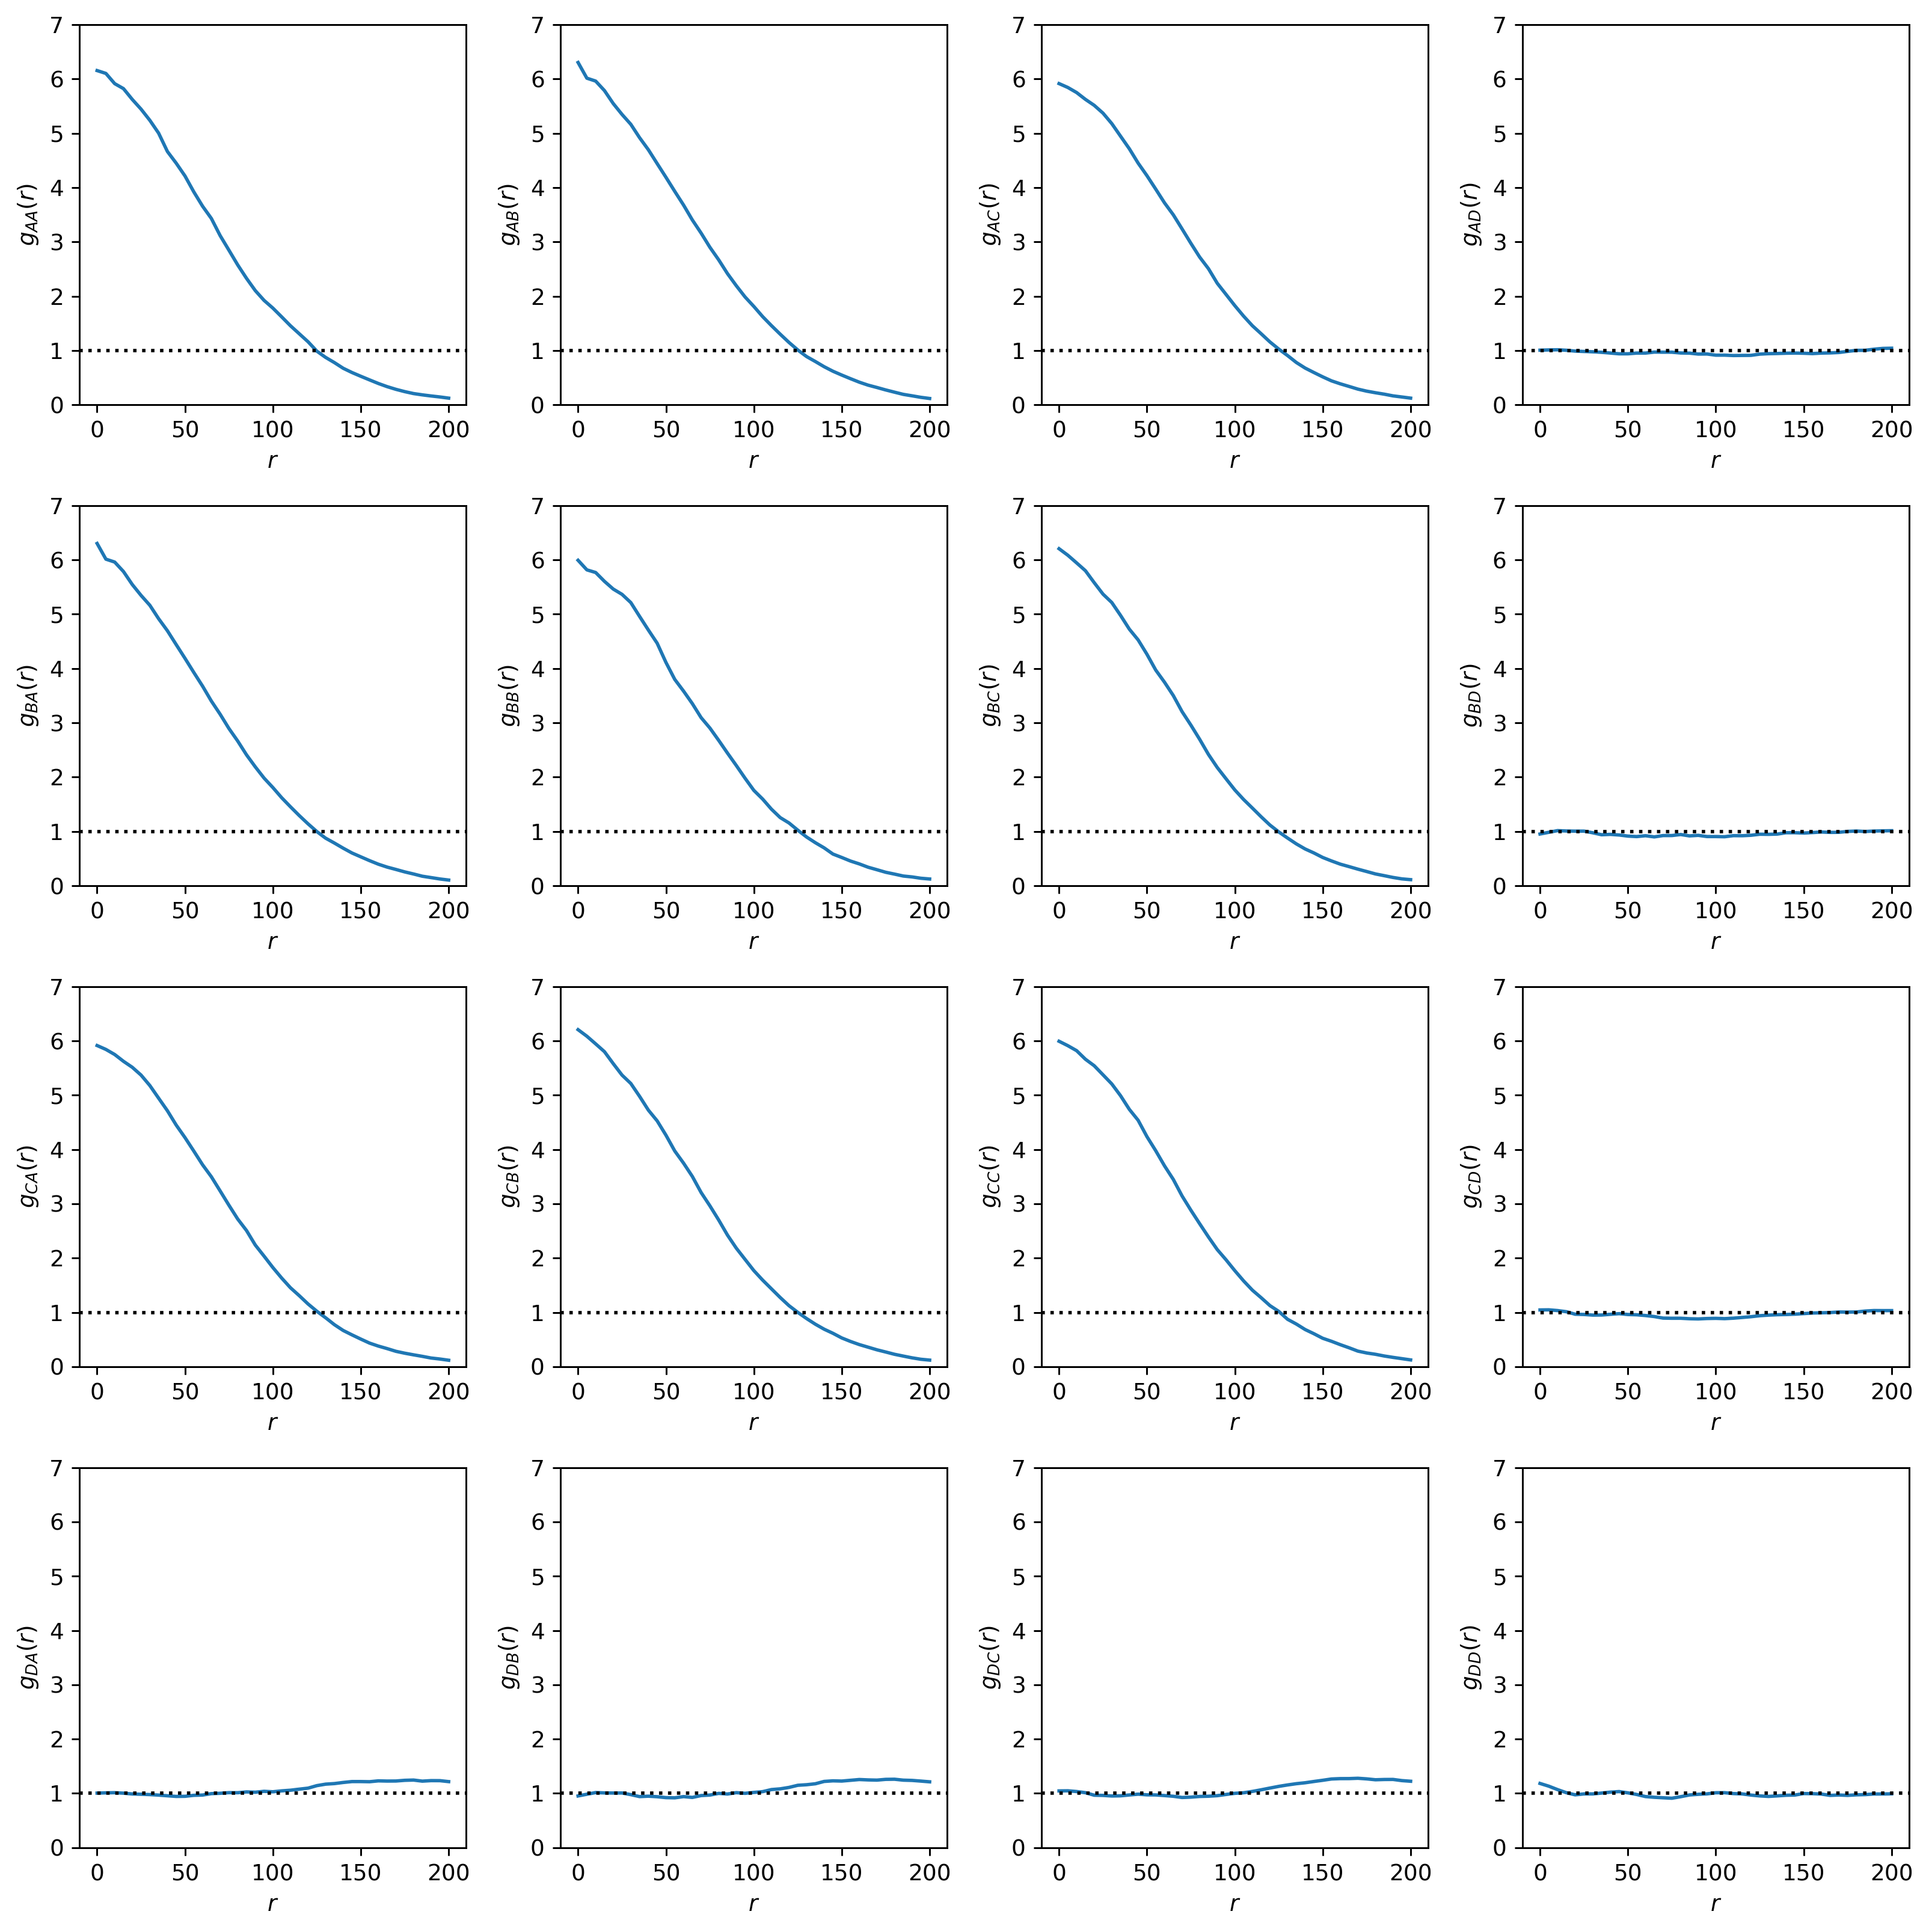

In [3]:
# Define the cell types to be analyzed
celltypes = ['A', 'B', 'C', 'D']

# Create a 4x4 subplot for visualizing the cross-PCF for each combination of cell types
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

# Loop through each combination of cell types
for i in range(4):
    for j in range(4):
        # Calculate the cross-PCF for the current combination of cell types
        r, PCF = ms.spatial_statistics.cross_pair_correlation_function(
            domain, 
            ('Celltype', celltypes[i]), 
            ('Celltype', celltypes[j]), 
            max_R=200, 
            annulus_step=5, 
            annulus_width=25
        )
        
        # Select the current subplot
        ax = axes[i, j]
        
        # Plot the cross-PCF
        ax.plot(r, PCF)
        
        # Add a horizontal line at y=1 to indicate the CSR baseline
        ax.axhline(1, color='k', linestyle=':')
        
        # Set the y-axis limit
        ax.set_ylim([0, 7])
        
        # Label the y-axis with the cross-PCF notation
        ax.set_ylabel(f'$g_{{{celltypes[i]}{celltypes[j]}}}(r)$')
        
        # Label the x-axis with the distance r
        ax.set_xlabel('$r$')

# Adjust the layout to prevent overlap
plt.tight_layout()